In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

## Exploratory Data Analysis

In [5]:
## Missing value

In [6]:
df.isnull().sum()/len(df)*100

id                     0.000000
player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
position

> We have a lot of missing values that we need to handle

In [7]:
id_features=[features for features in df.columns if 'id' in features and features!='sliding_tackle']
id_features

['id', 'player_fifa_api_id', 'player_api_id']

In [8]:
for features in id_features:
    print("Unique values in",features,"are",len(df[features].unique()))

Unique values in id are 183978
Unique values in player_fifa_api_id are 11062
Unique values in player_api_id are 11060


In [9]:
numerical_features=[features for features in df.columns if df[features].dtype!='O']
numerical_features

['id',
 'player_fifa_api_id',
 'player_api_id',
 'overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

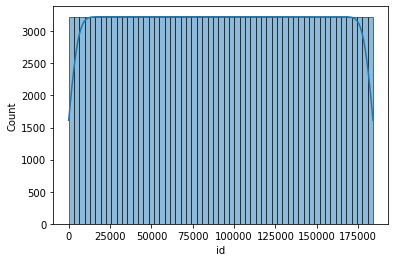

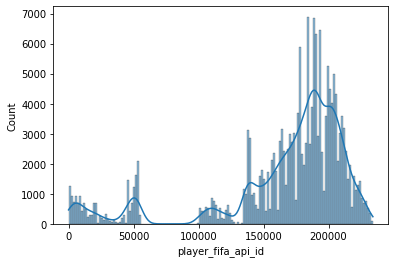

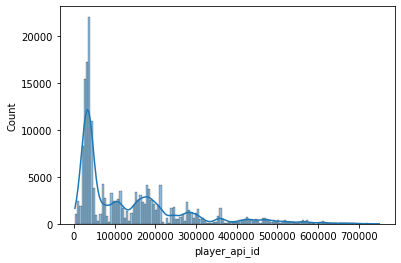

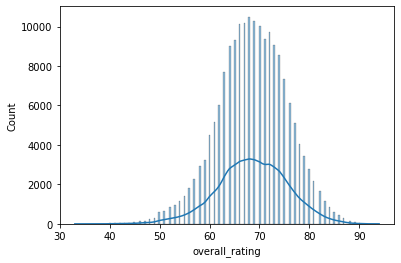

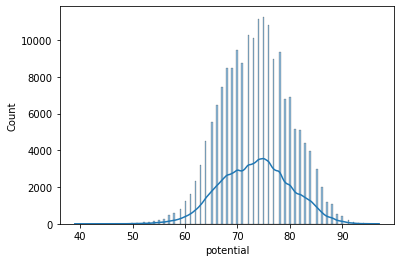

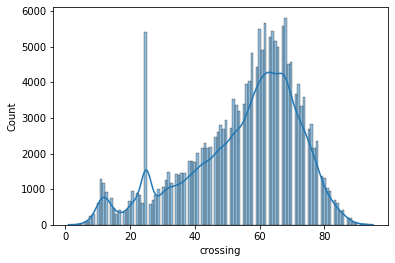

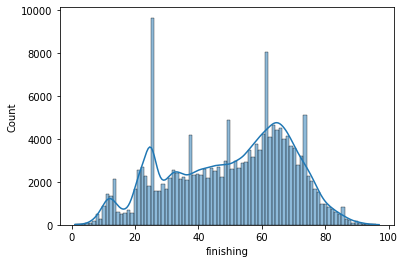

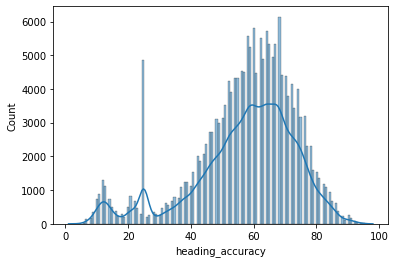

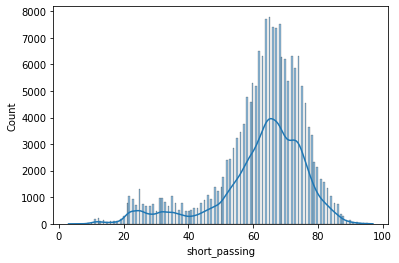

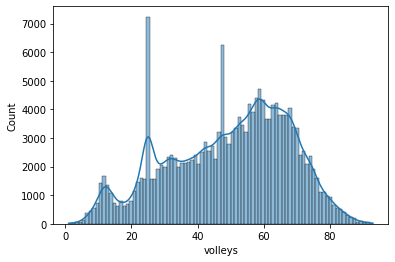

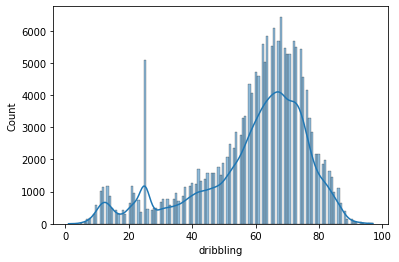

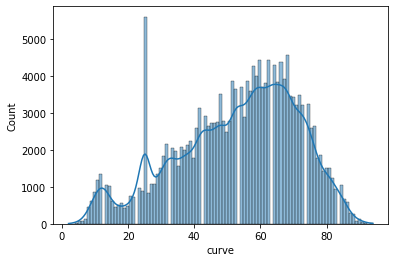

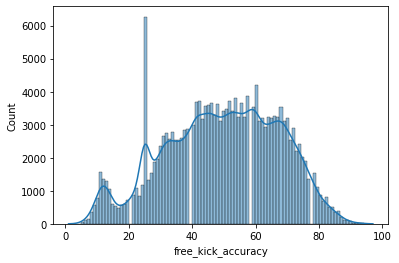

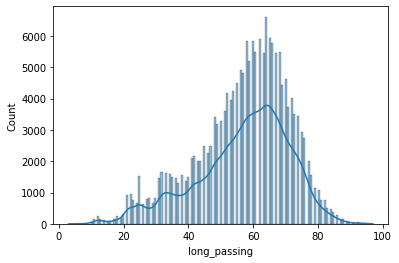

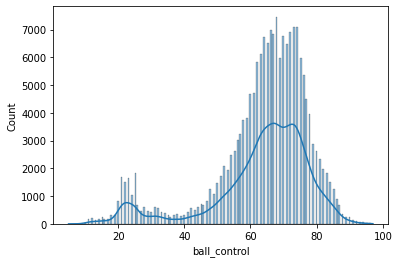

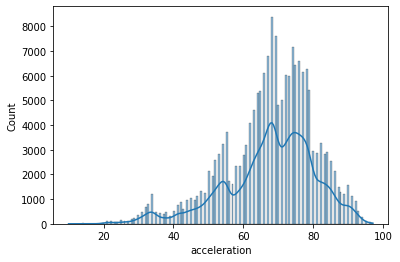

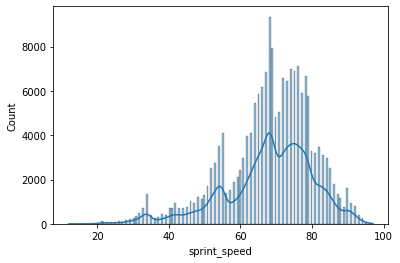

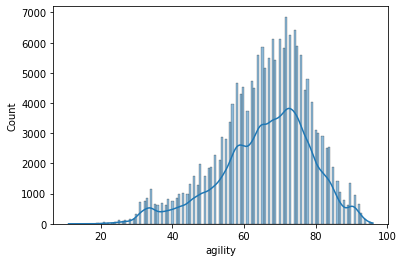

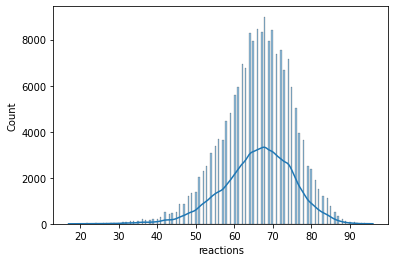

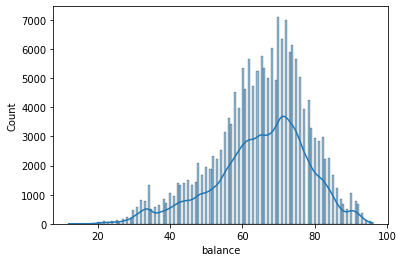

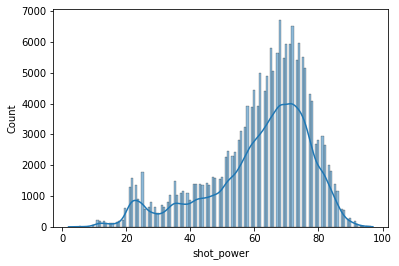

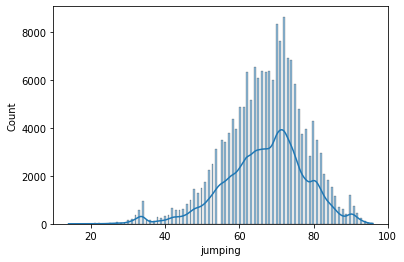

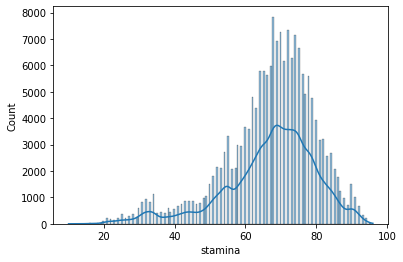

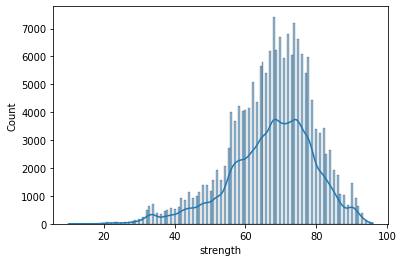

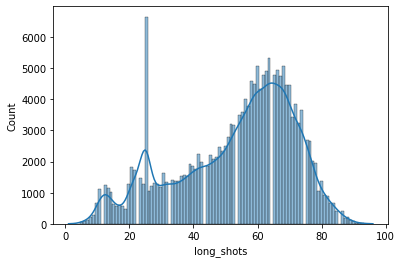

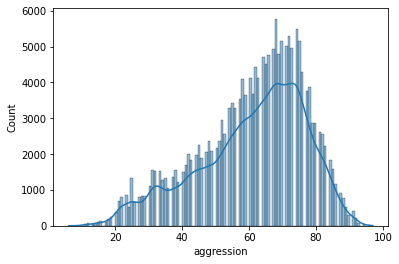

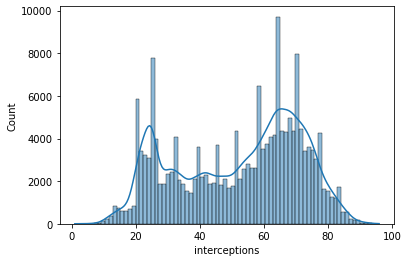

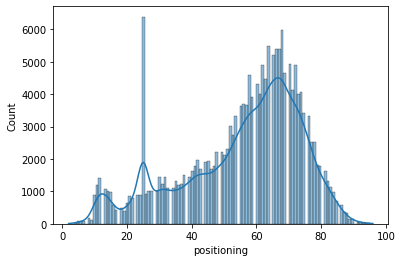

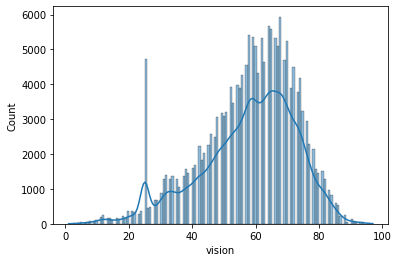

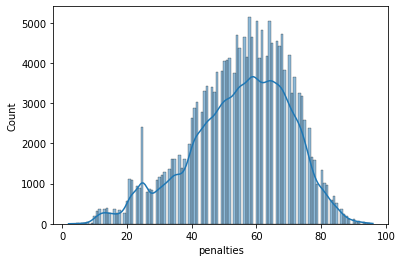

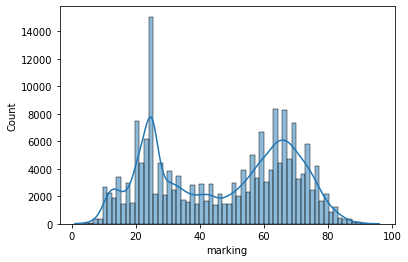

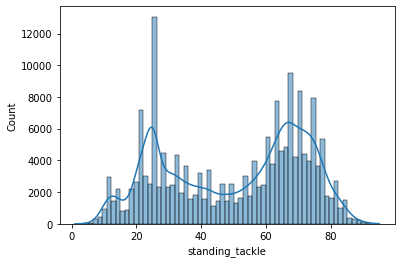

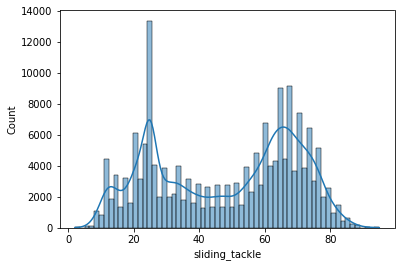

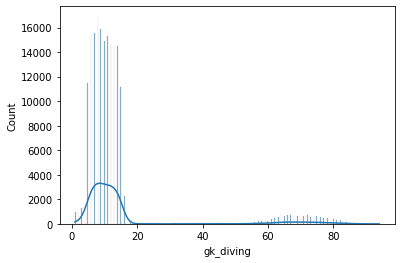

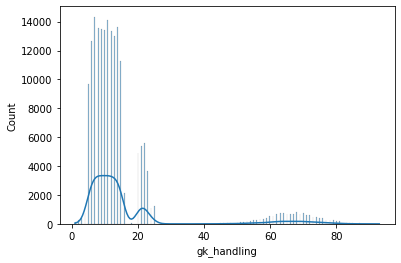

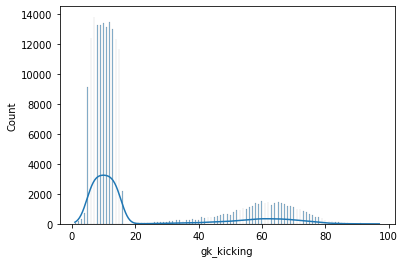

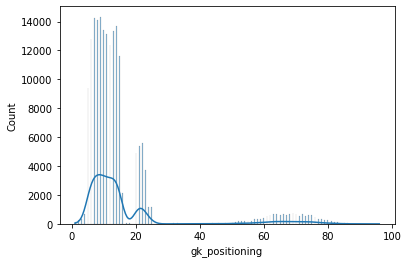

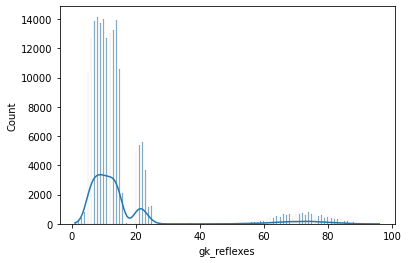

In [10]:
## distribution in continuous features
for features in numerical_features:
    sns.histplot(df[features],kde=1)
    plt.xlabel(features)
    plt.show()

> 'id' is not relevant for our model so we would drop it later

> player_api_id and player_fifa_id are largely skewed

> other features are a bit skewed normally distributed

In [11]:
#log normal transformation
def plots(df,name,trans):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[name],kde=1)
    plt.title('Actual '+name)
    plt.subplot(122)
    sns.distplot(trans,kde=1)
    plt.title('After Tranformation '+name)
    plt.show()

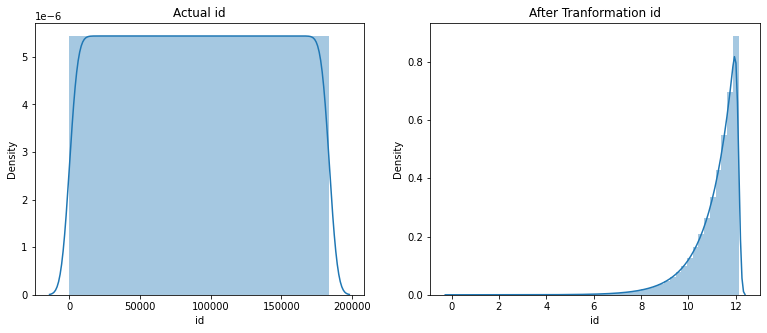

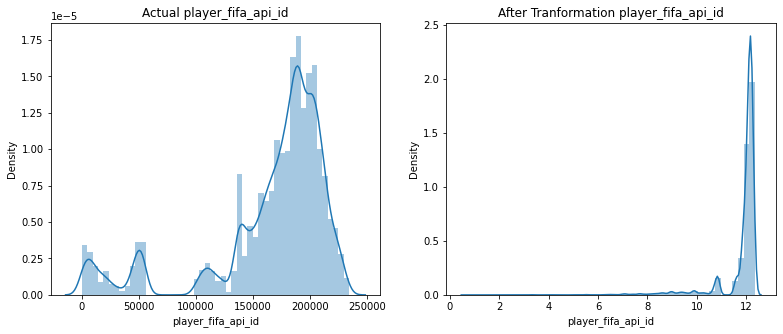

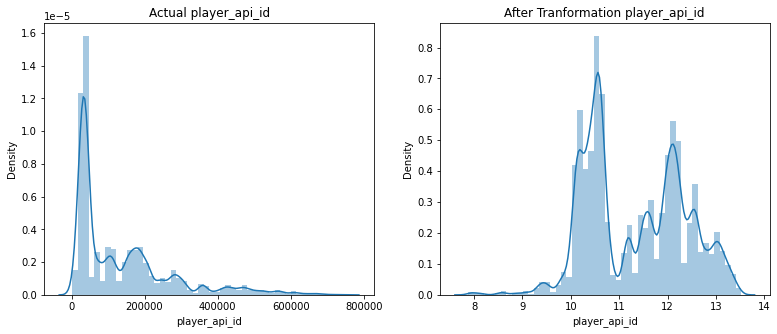

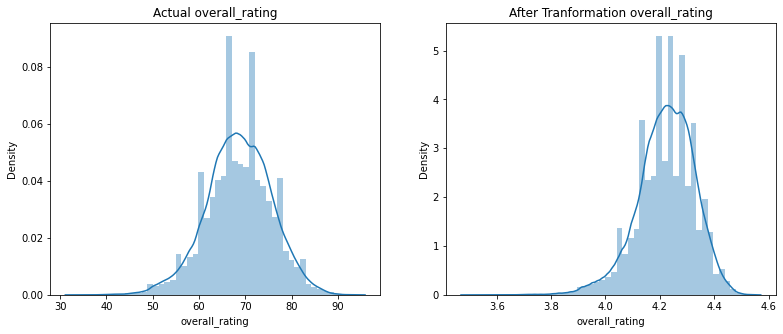

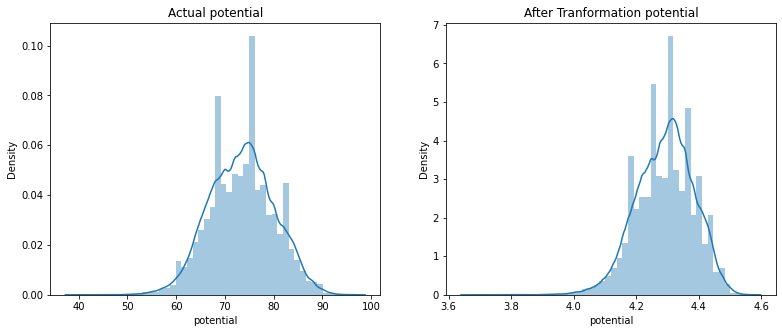

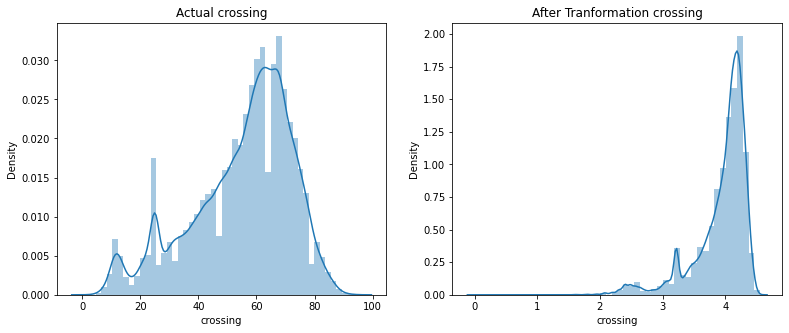

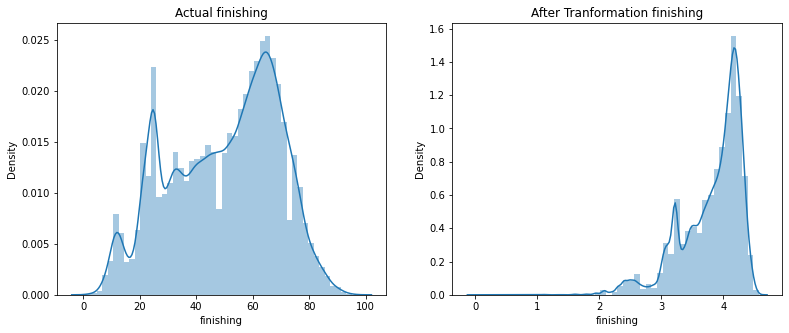

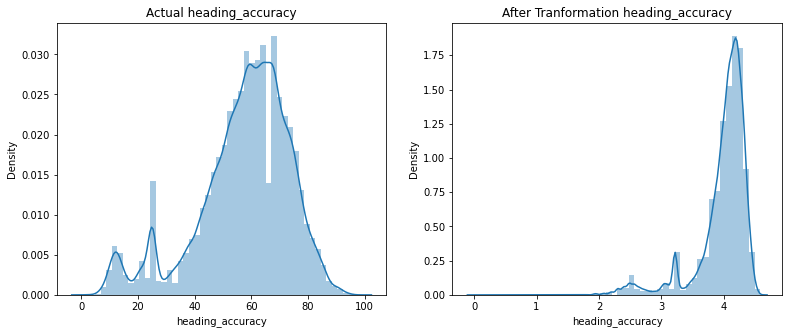

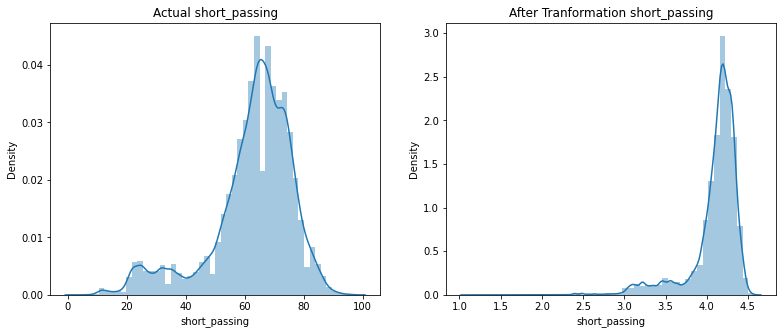

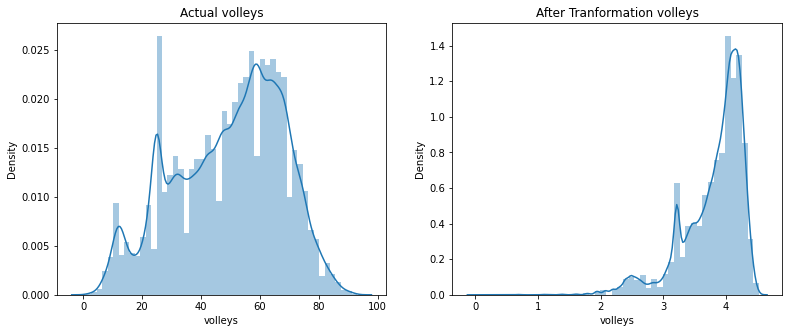

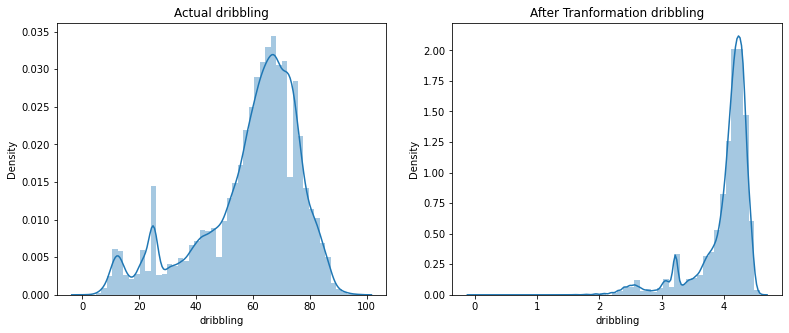

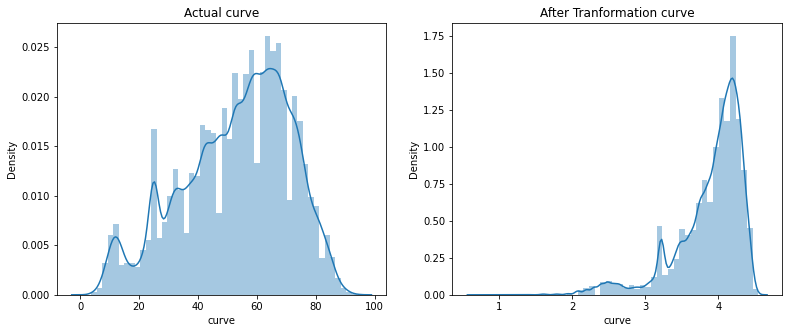

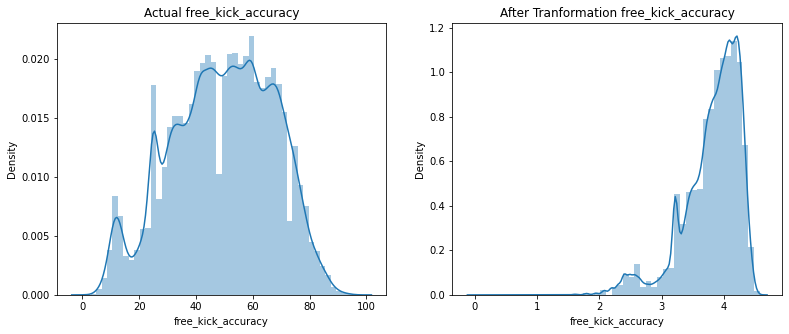

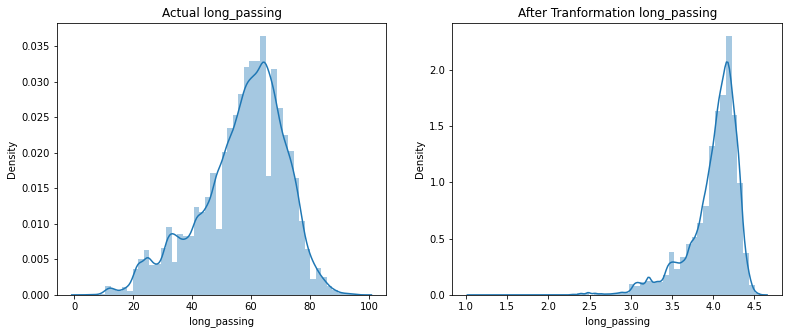

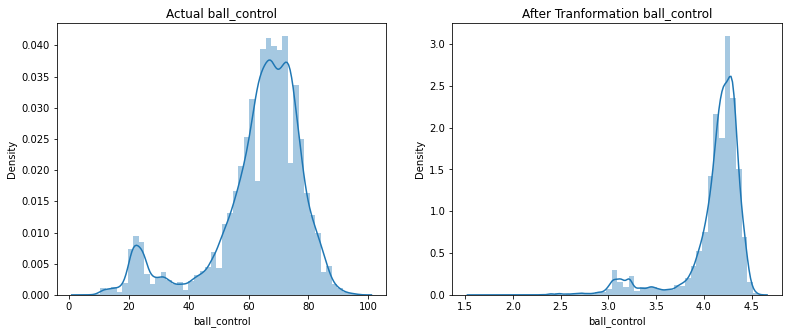

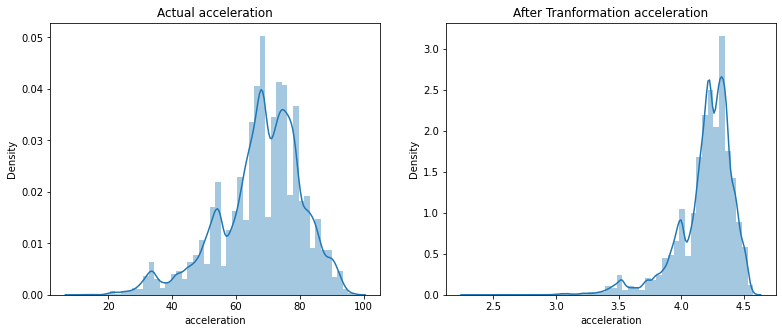

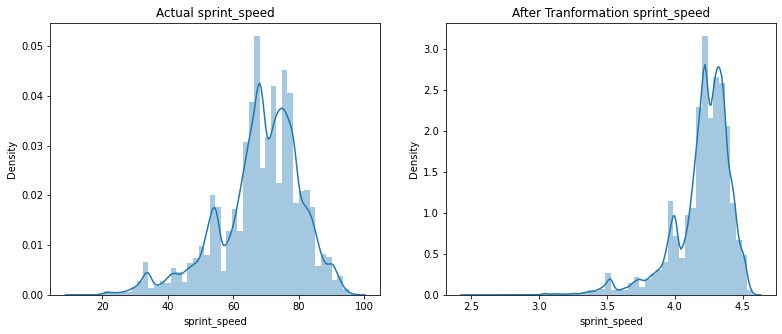

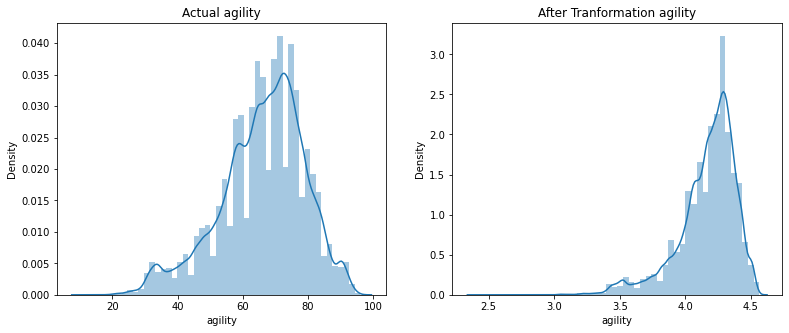

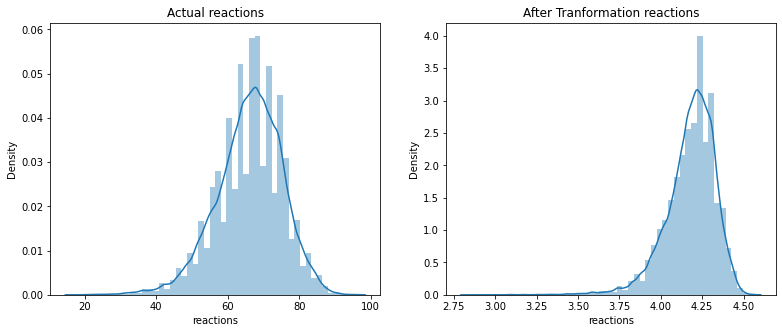

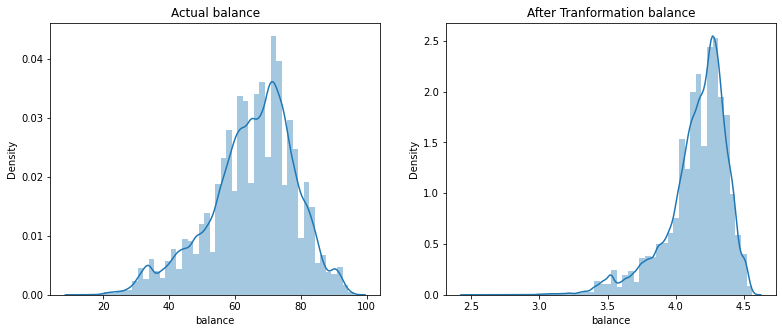

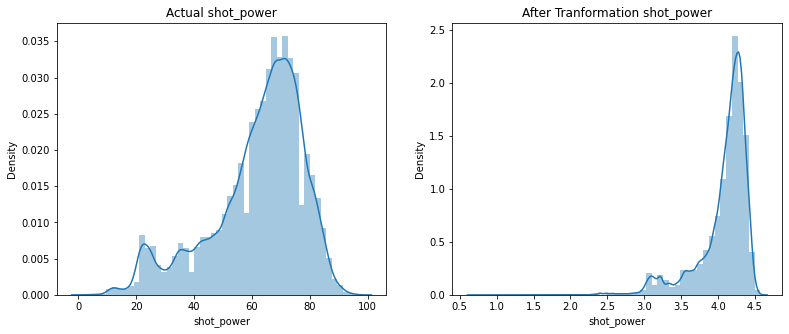

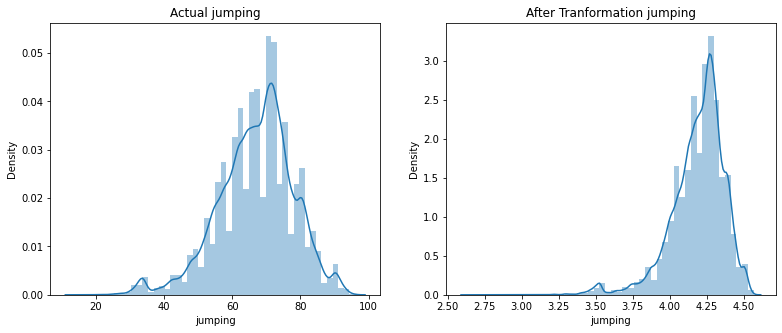

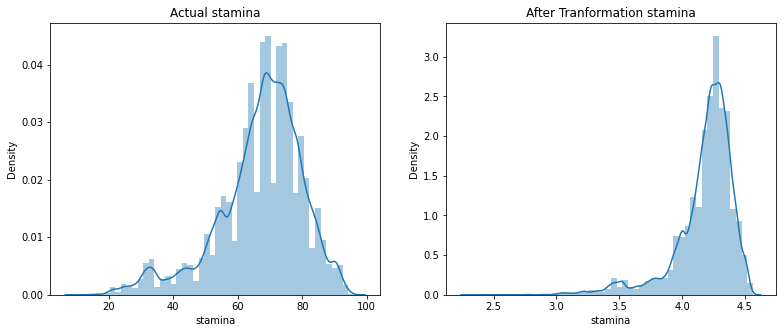

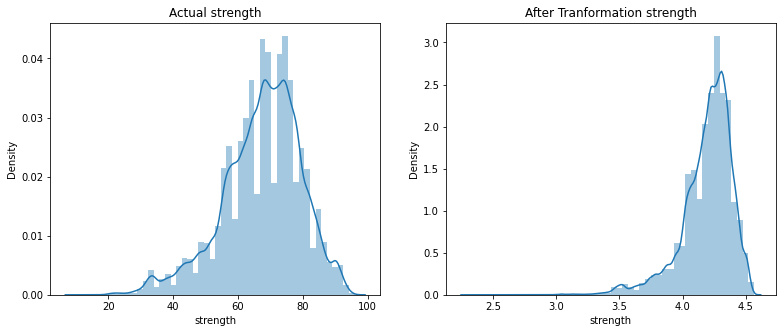

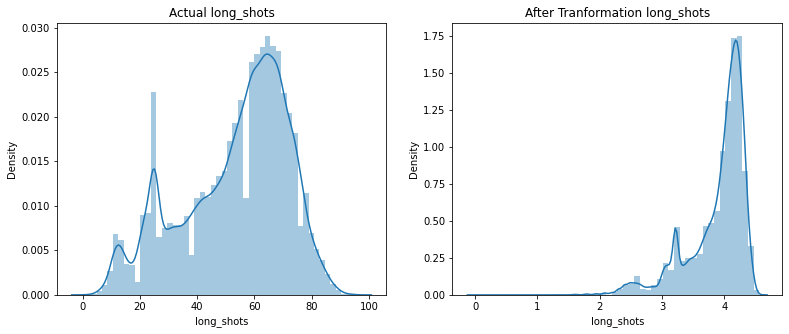

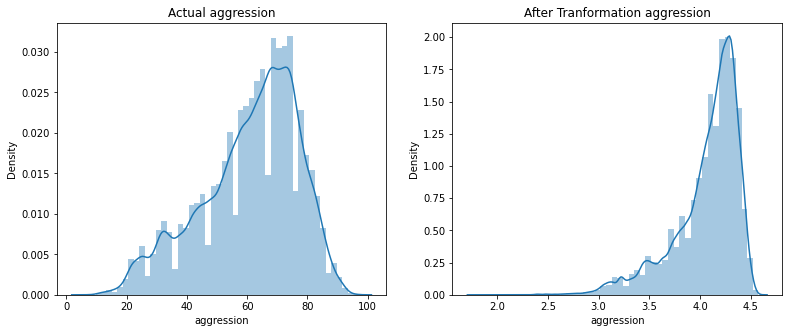

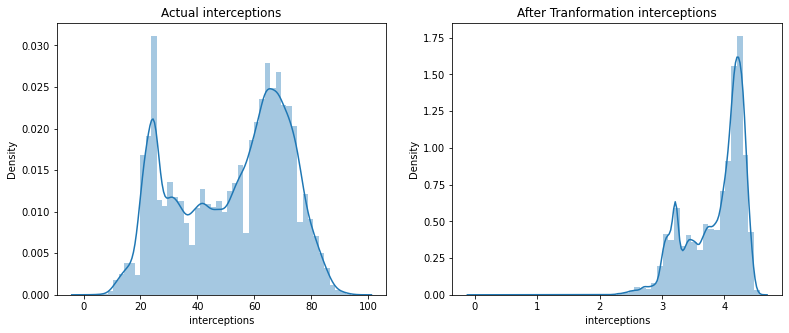

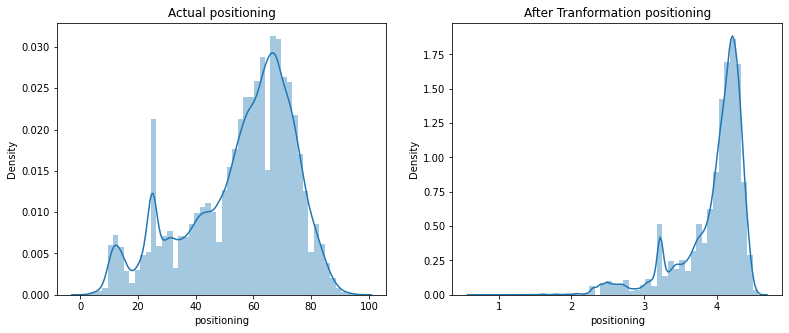

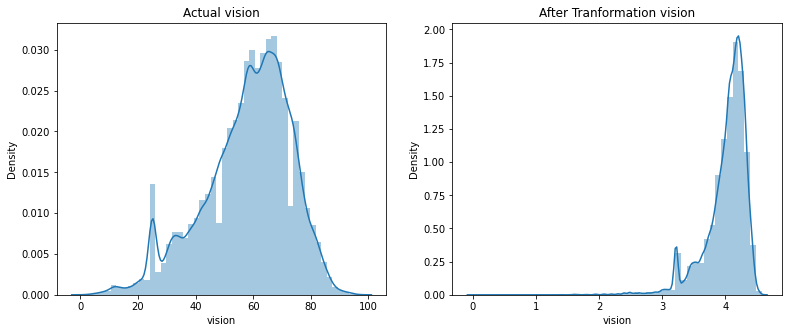

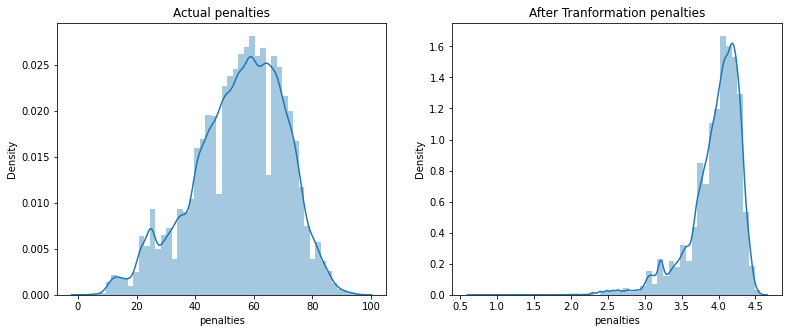

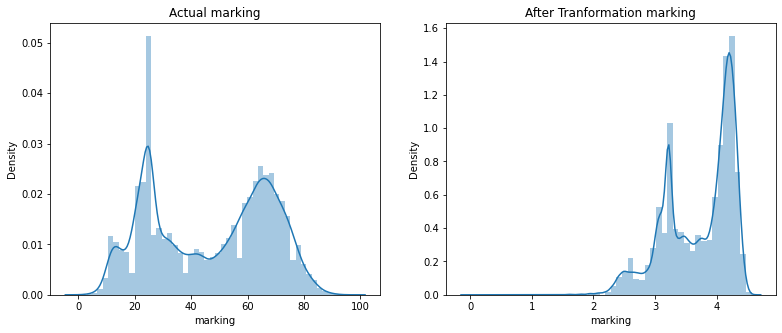

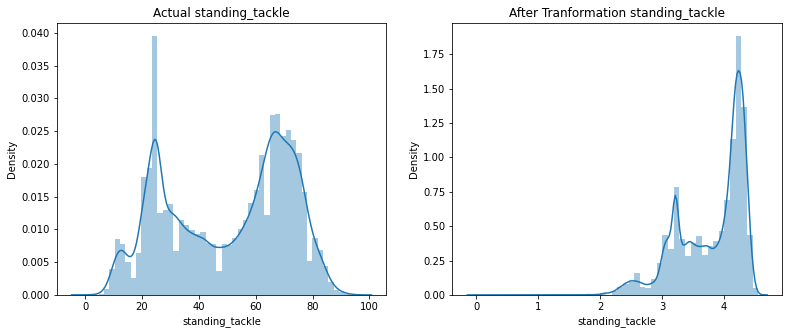

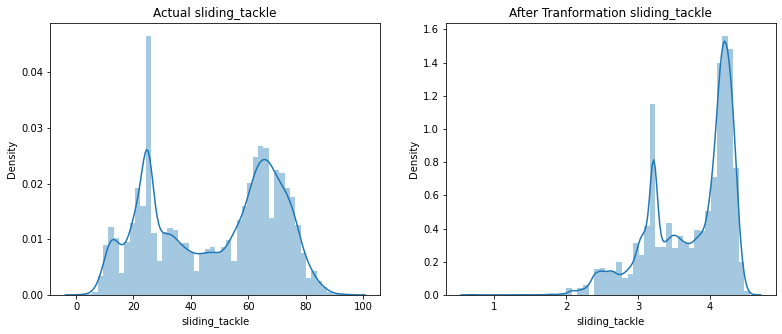

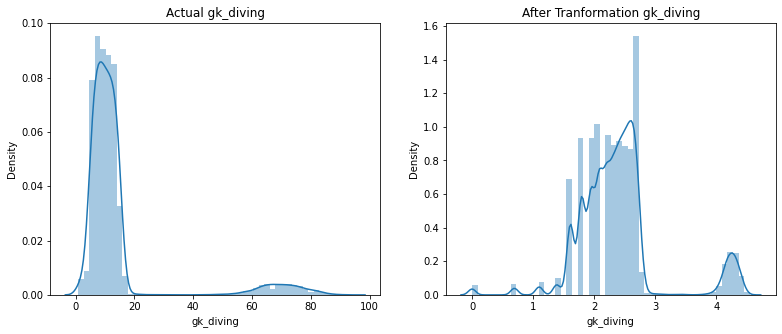

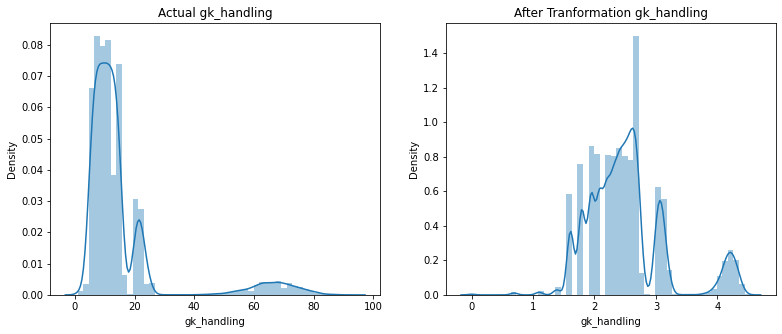

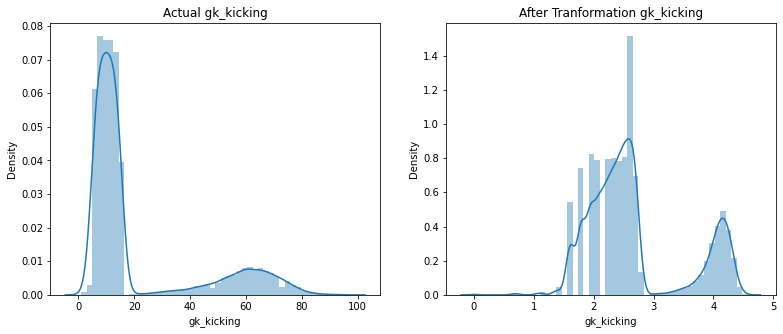

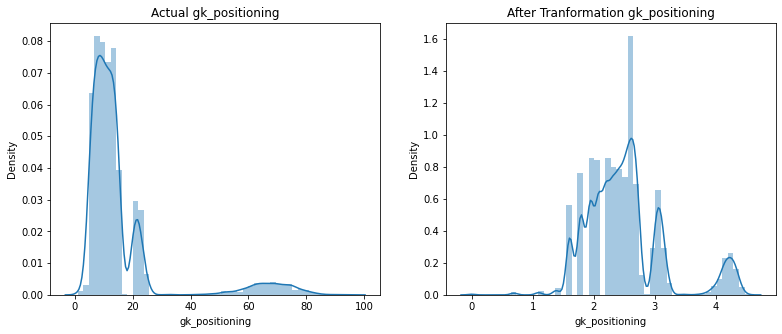

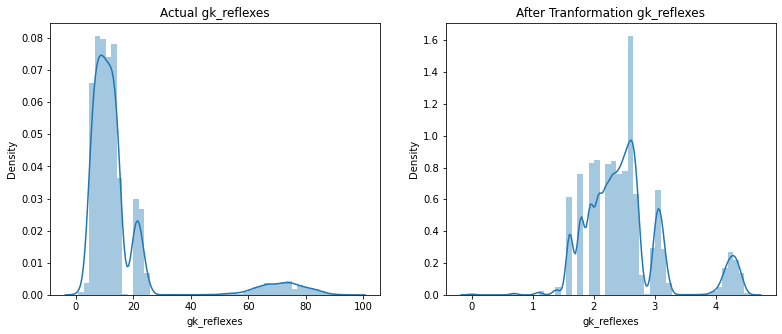

In [12]:
for features in numerical_features:
    if(0 not in df[features].unique()):
        plots(df,features,np.log(df[features]))

> We can observe that after log transformation the data does not get normally distributed in fact it shows more skewness

In [13]:
def plots(df,name,trans):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[name],kde=1)
    plt.title('Actual '+name)
    plt.subplot(122)
    sns.distplot(trans.fit_transform(df[[name]]),kde=1)
    plt.title('After Tranformation '+name)
    plt.show()

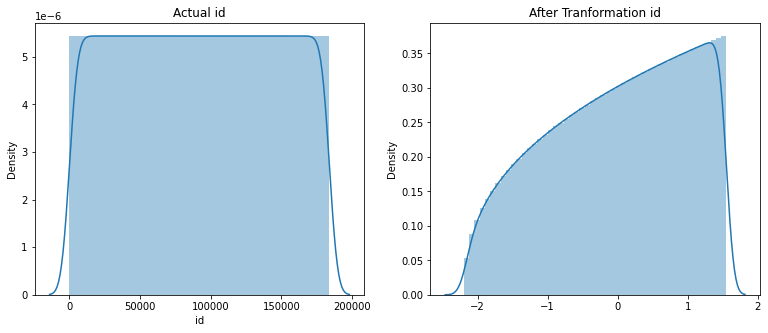

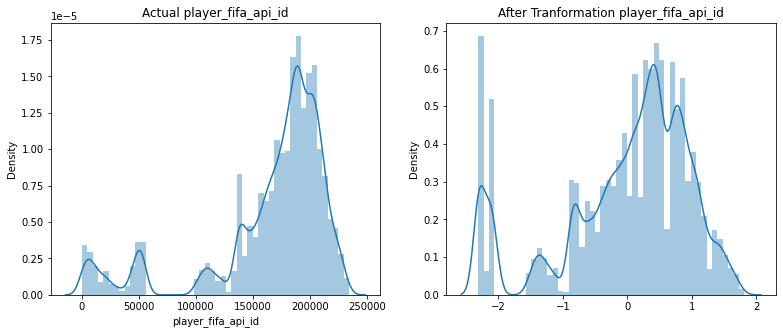

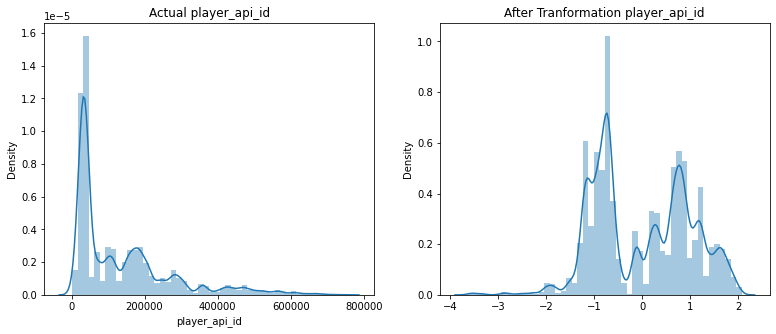

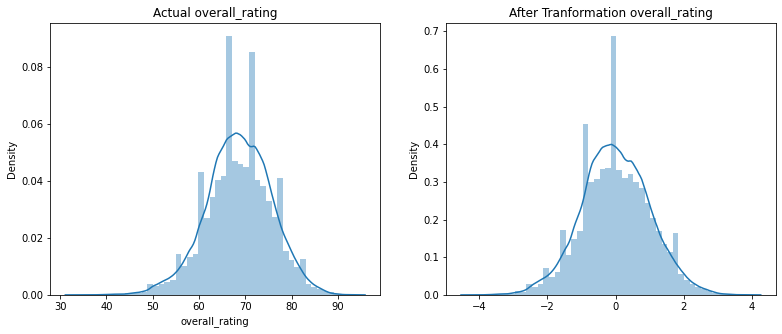

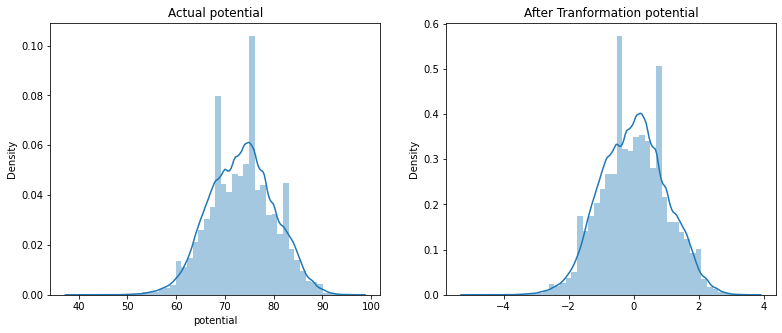

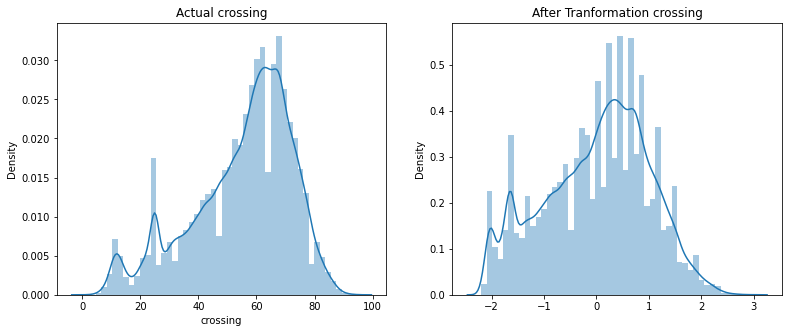

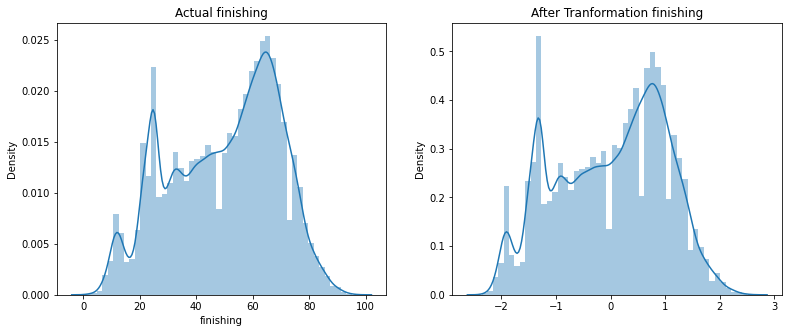

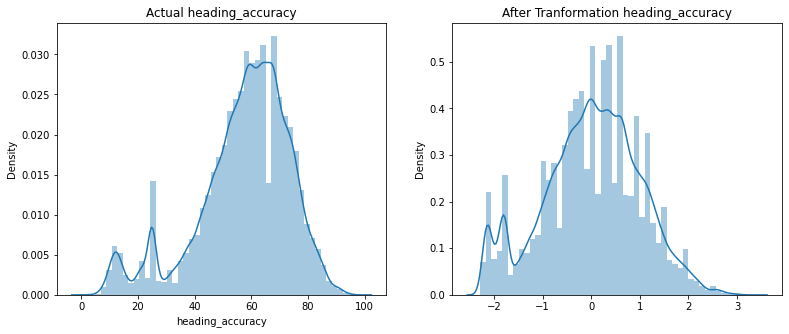

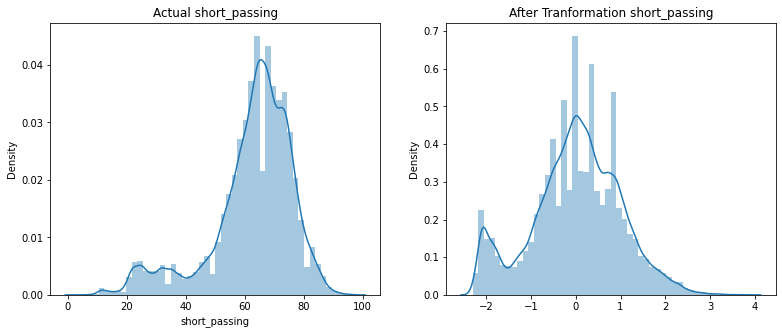

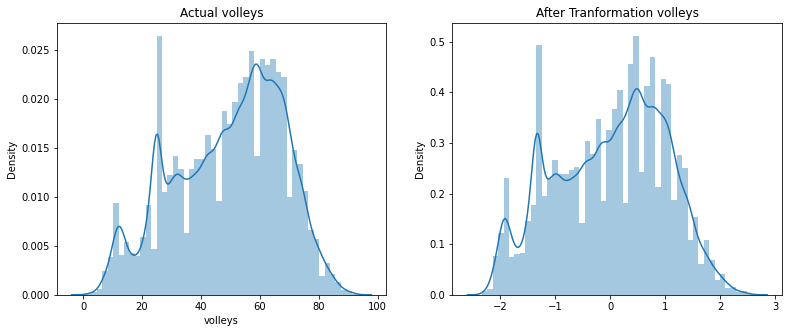

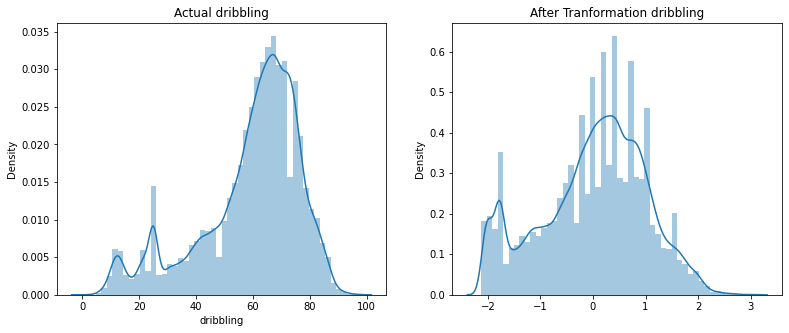

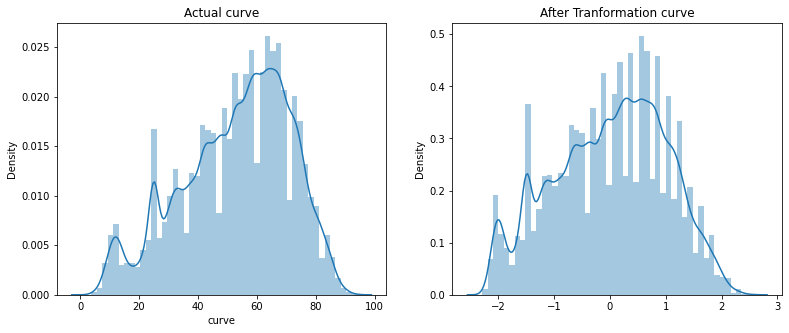

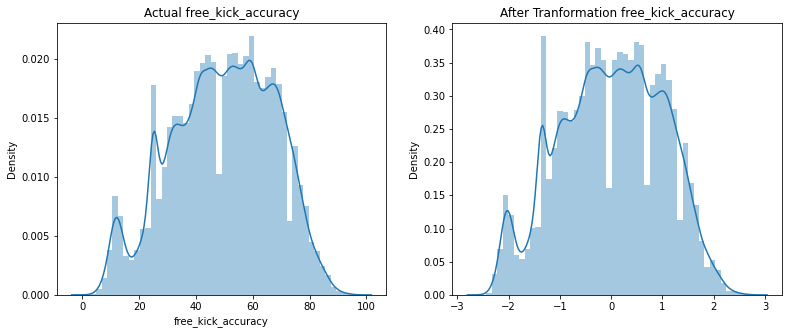

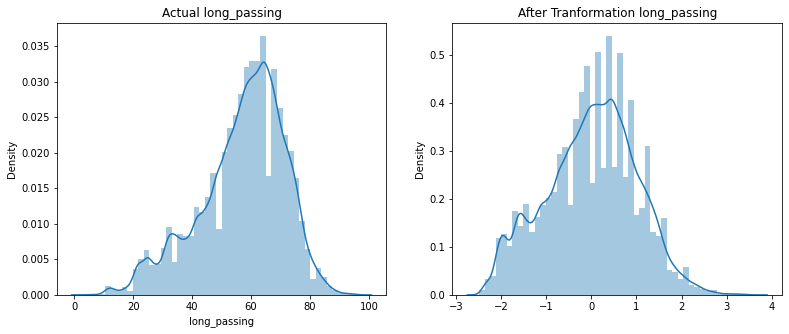

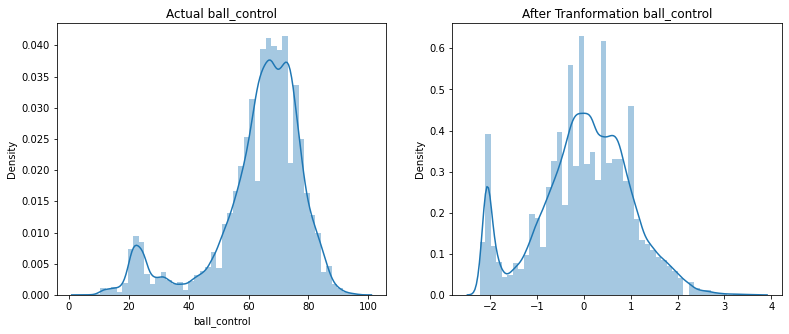

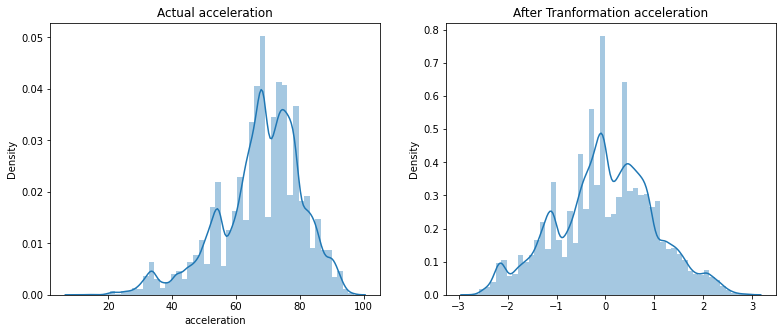

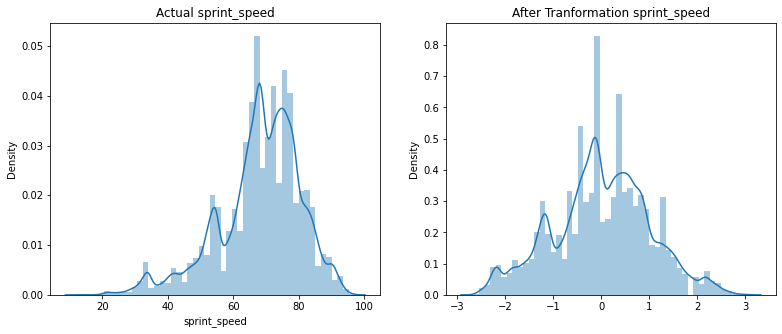

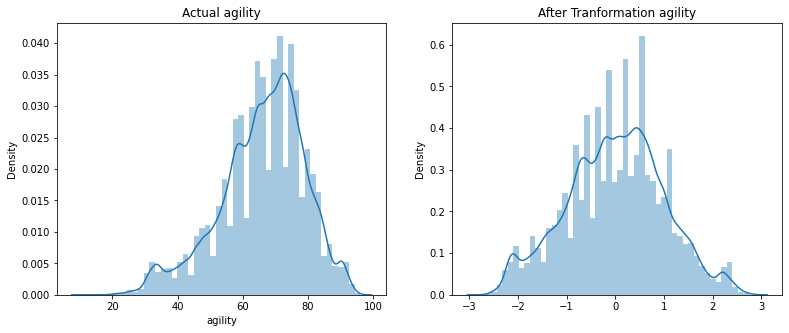

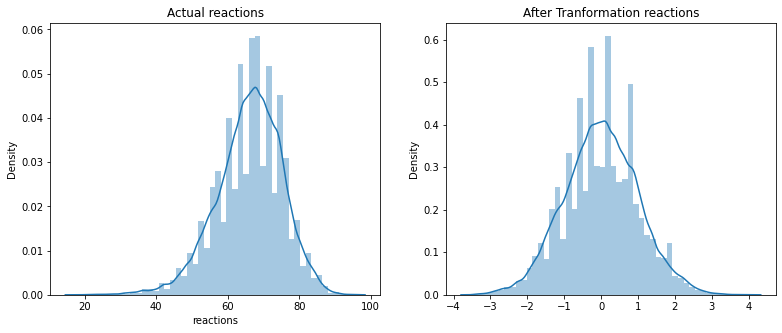

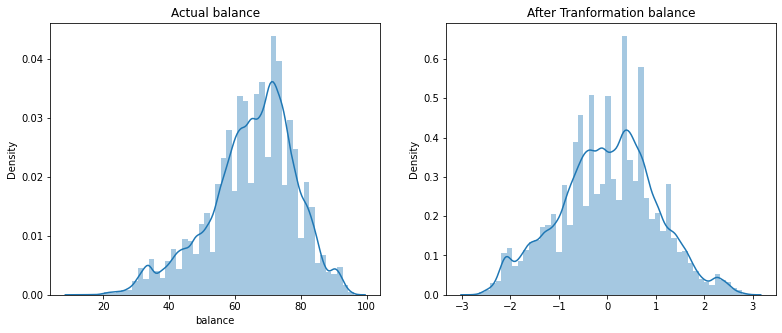

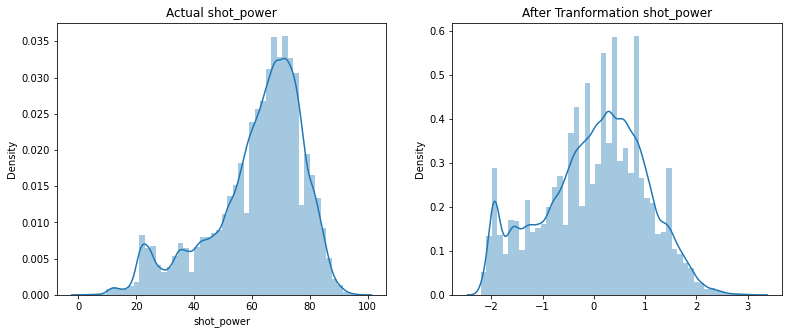

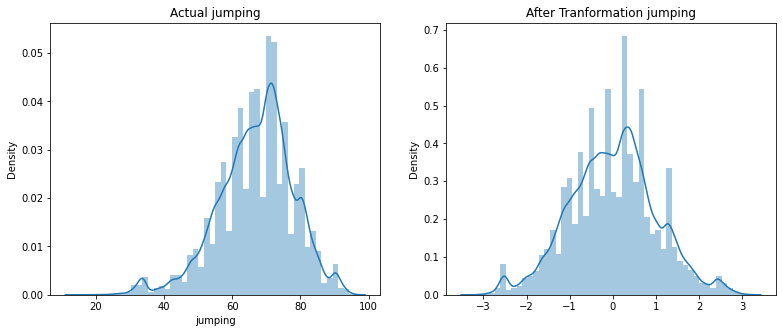

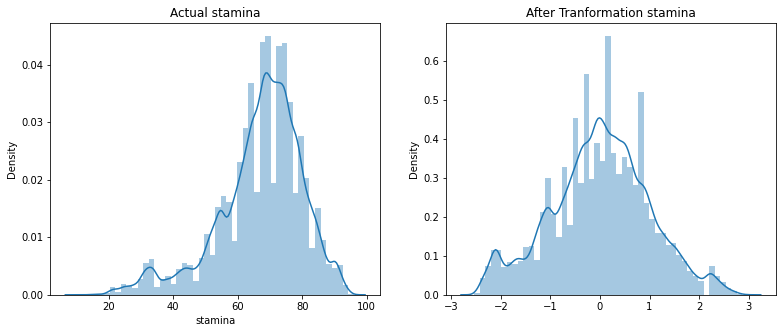

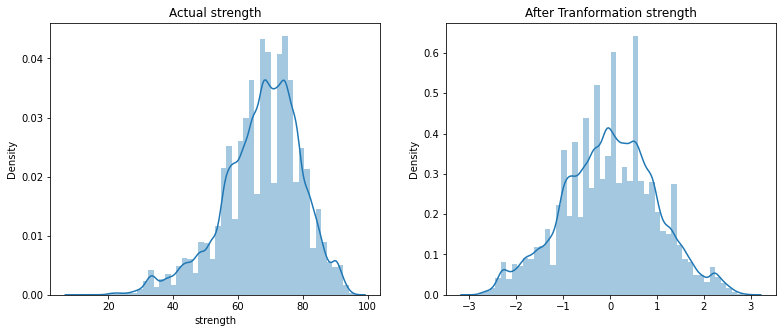

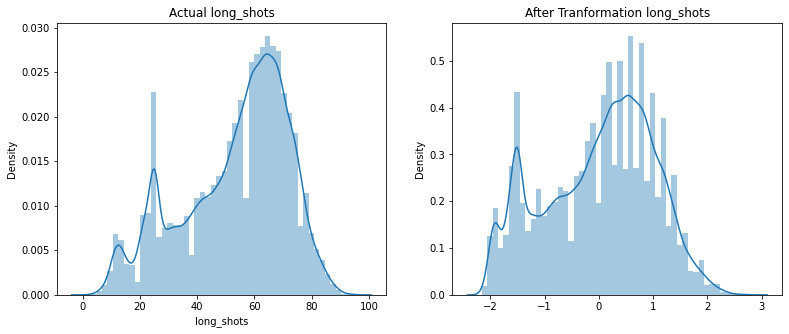

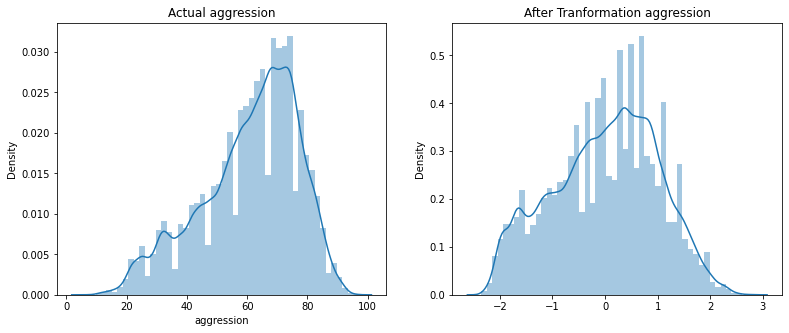

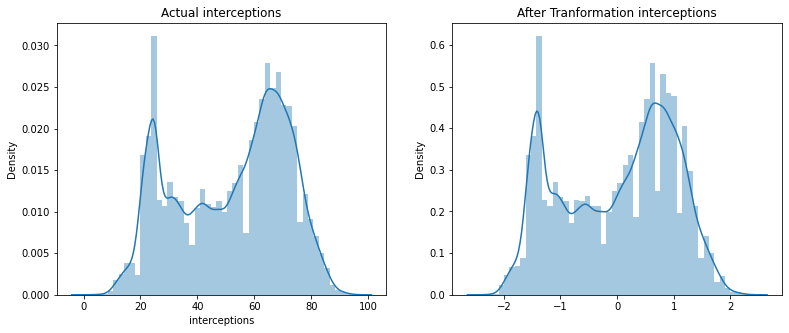

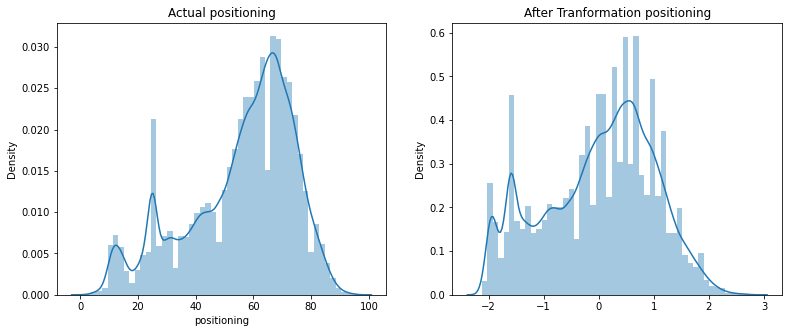

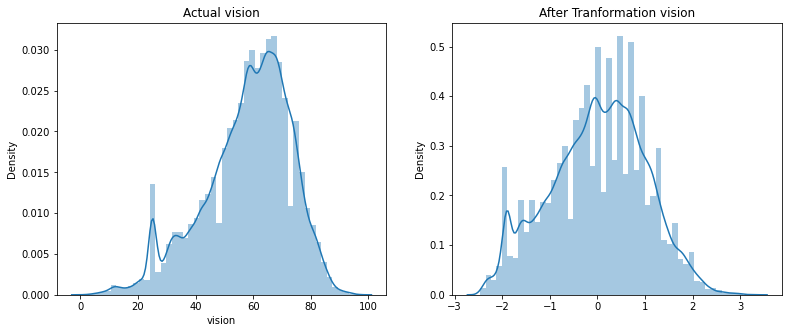

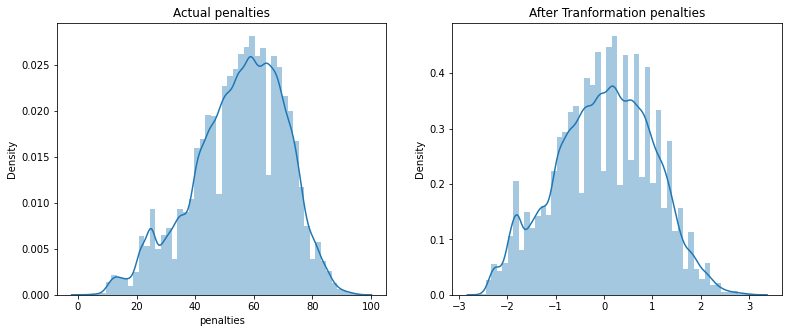

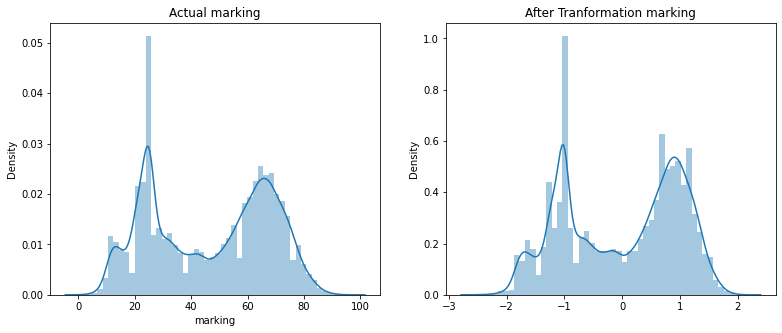

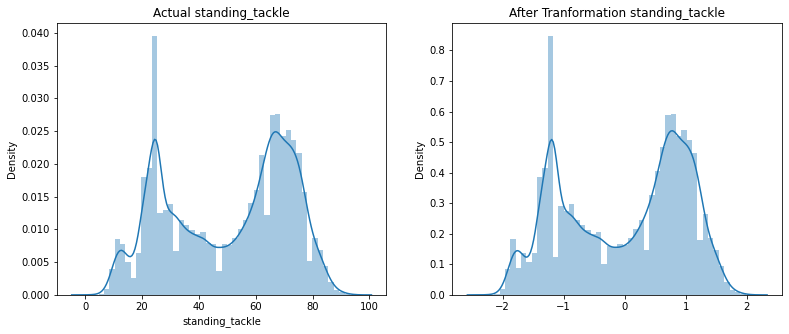

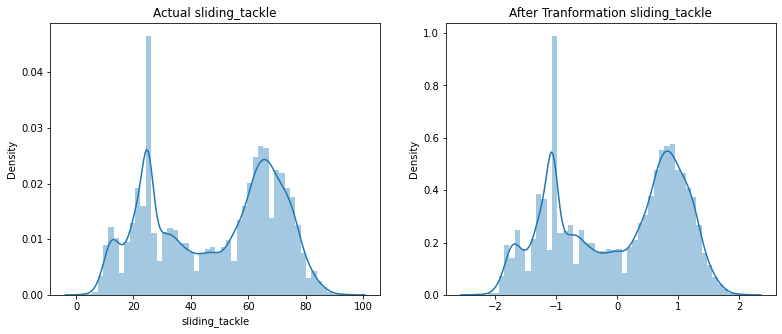

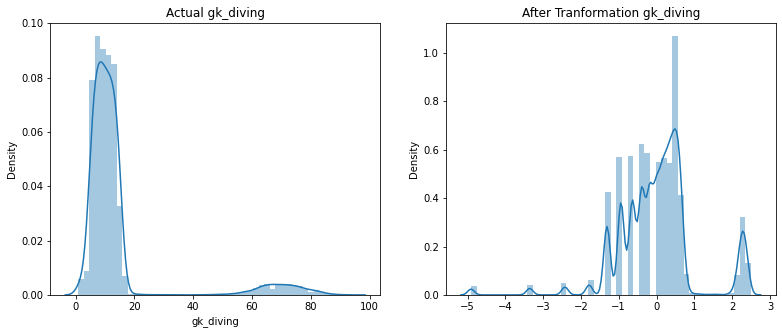

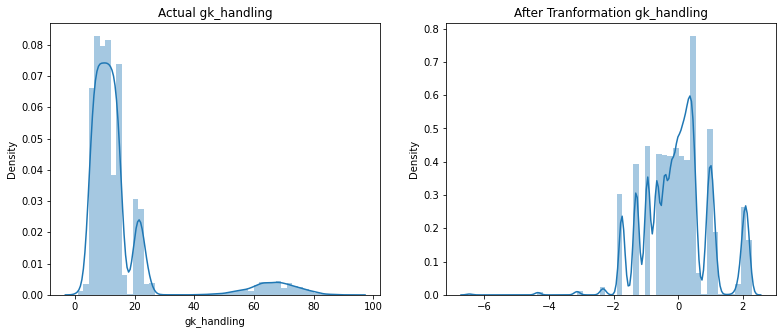

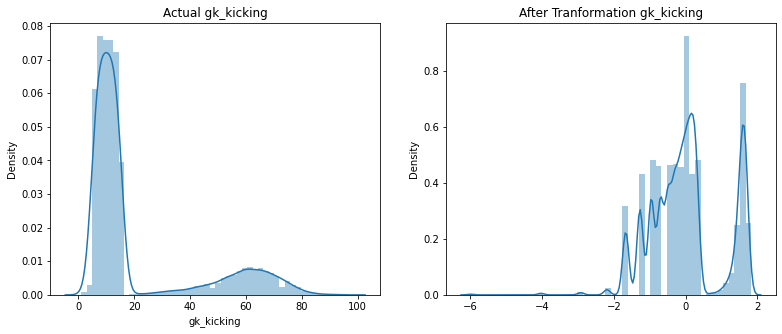

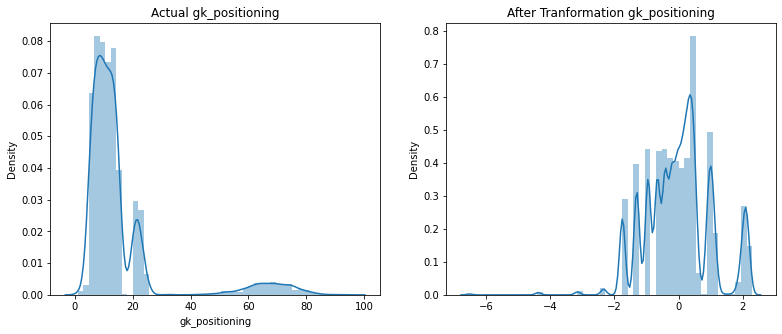

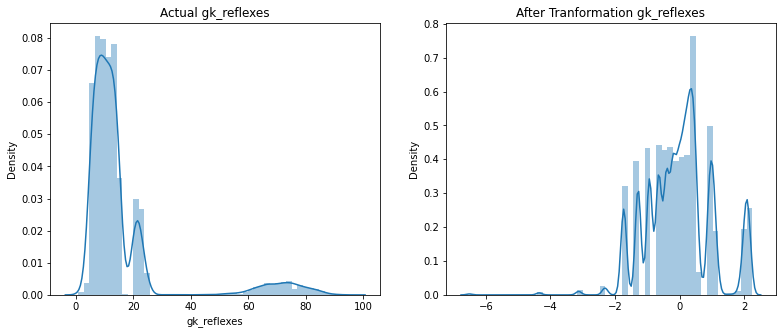

In [14]:
from sklearn.preprocessing import PowerTransformer
for features in numerical_features:
        plots(df,features,PowerTransformer())

> We can see that power transformation makes our data more normally distributed and will be good for our model

In [15]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
categorical_features

['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

In [16]:
for features in categorical_features:
    print("Unique values in",features,"are",len(df[features].unique()))

Unique values in date are 197
Unique values in preferred_foot are 3
Unique values in attacking_work_rate are 9
Unique values in defensive_work_rate are 20


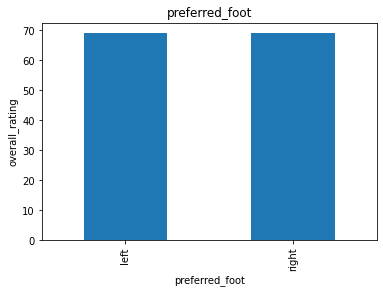

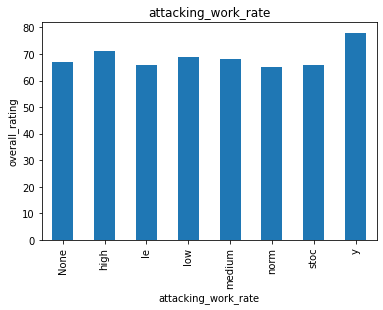

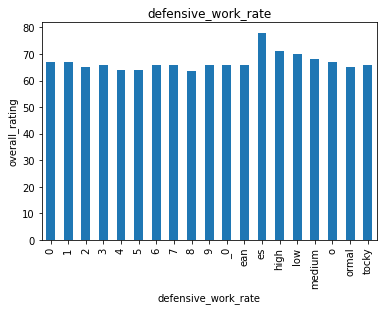

In [17]:
for feature in categorical_features:
    data=df.copy()
    if feature!='date':
        data.groupby(feature)['overall_rating'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('overall_rating')
        plt.title(feature)
        plt.show()

> Temporal Data

In [18]:
df['date'].unique()

array(['2016-02-18 00:00:00', '2015-11-19 00:00:00',
       '2015-09-21 00:00:00', '2015-03-20 00:00:00',
       '2007-02-22 00:00:00', '2016-04-21 00:00:00',
       '2016-04-07 00:00:00', '2016-01-07 00:00:00',
       '2015-12-24 00:00:00', '2015-12-17 00:00:00',
       '2015-10-16 00:00:00', '2015-09-25 00:00:00',
       '2015-01-09 00:00:00', '2014-12-05 00:00:00',
       '2014-11-07 00:00:00', '2014-09-18 00:00:00',
       '2014-05-02 00:00:00', '2014-04-04 00:00:00',
       '2014-03-14 00:00:00', '2013-12-13 00:00:00',
       '2013-11-08 00:00:00', '2013-10-04 00:00:00',
       '2013-09-20 00:00:00', '2013-05-03 00:00:00',
       '2013-03-22 00:00:00', '2013-03-15 00:00:00',
       '2013-02-22 00:00:00', '2013-02-15 00:00:00',
       '2012-08-31 00:00:00', '2012-02-22 00:00:00',
       '2011-08-30 00:00:00', '2010-08-30 00:00:00',
       '2010-02-22 00:00:00', '2009-08-30 00:00:00',
       '2009-02-22 00:00:00', '2008-08-30 00:00:00',
       '2015-10-09 00:00:00', '2014-12-12 00:0

In [19]:
df['date']=df['date'].str.replace(' 00:00:00','')
df['date']

0         2016-02-18
1         2015-11-19
2         2015-09-21
3         2015-03-20
4         2007-02-22
             ...    
183973    2009-08-30
183974    2009-02-22
183975    2008-08-30
183976    2007-08-30
183977    2007-02-22
Name: date, Length: 183978, dtype: object

Text(0, 0.5, 'Median overall_rating')

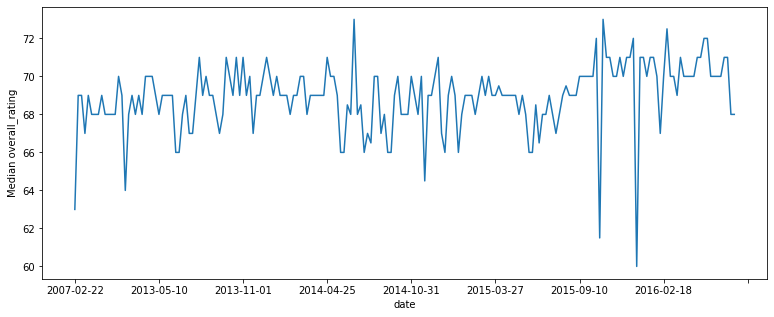

In [20]:
plt.figure(figsize=(13,5))
df.groupby('date')['overall_rating'].median().plot()
plt.xlabel('date')
plt.ylabel('Median overall_rating')

In [27]:
for features in categorical_features:
    if features!='date':
        print("Unique values in",features,"are",df[features].unique())

Unique values in preferred_foot are ['right' 'left' None]
Unique values in attacking_work_rate are ['medium' 'high' None 'low' 'None' 'le' 'norm' 'stoc' 'y']
Unique values in defensive_work_rate are ['medium' 'high' 'low' '_0' None '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']


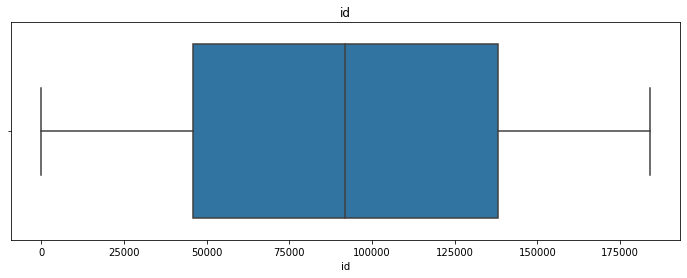

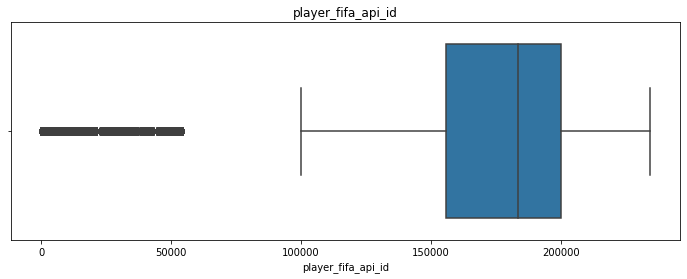

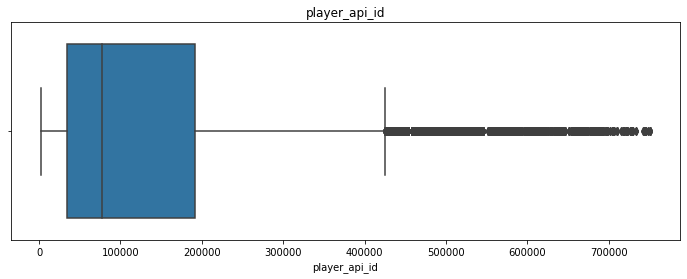

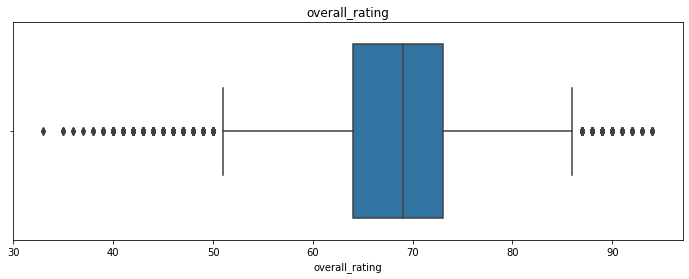

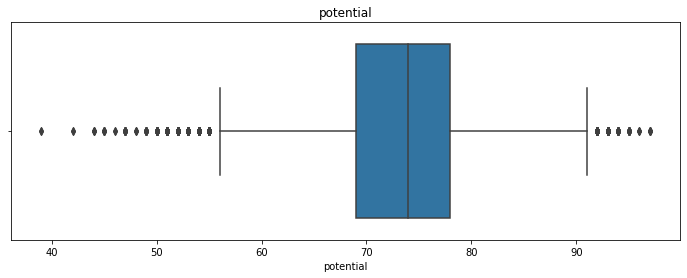

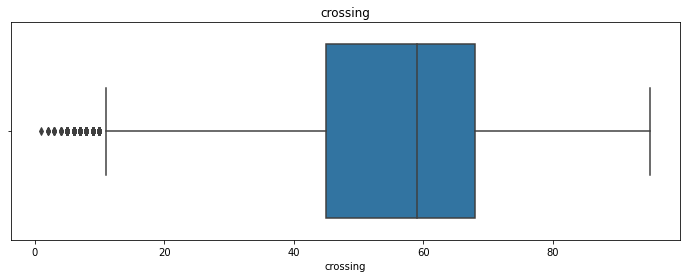

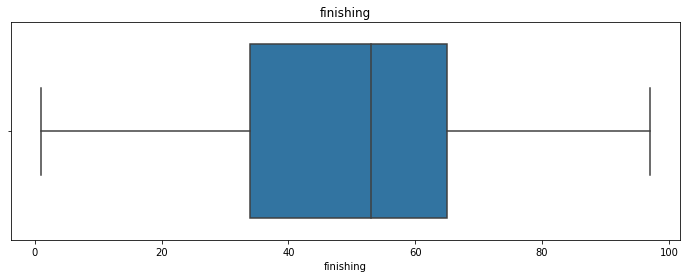

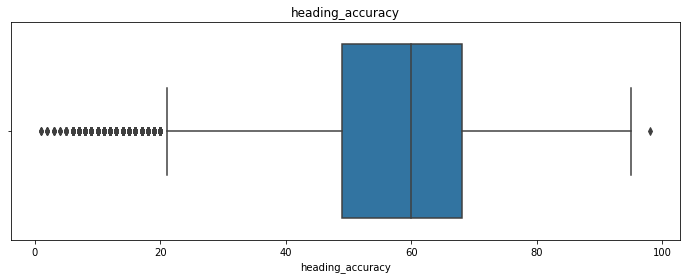

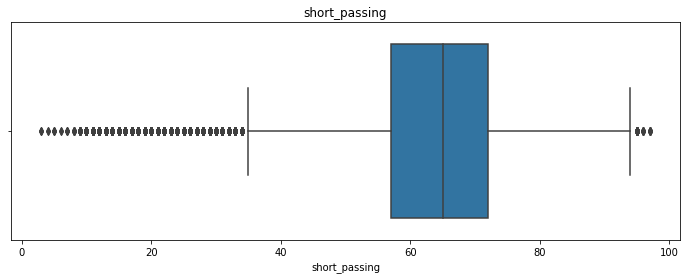

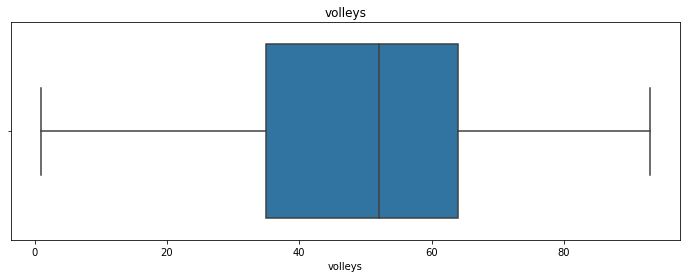

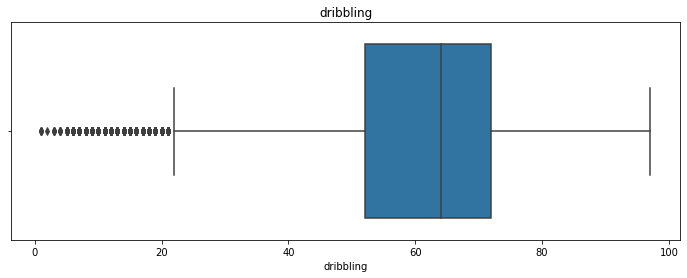

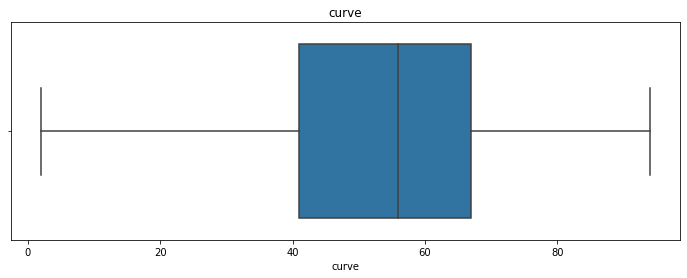

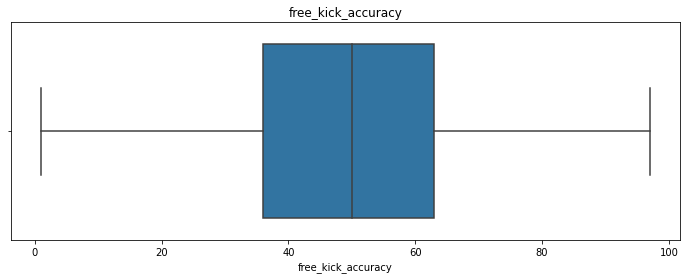

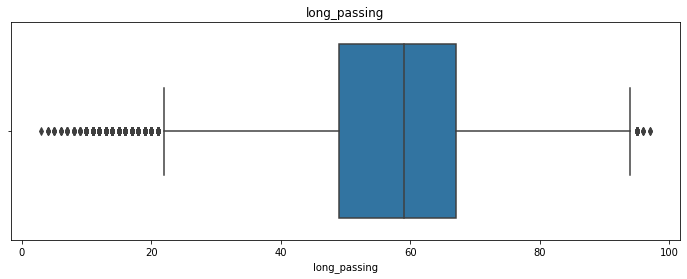

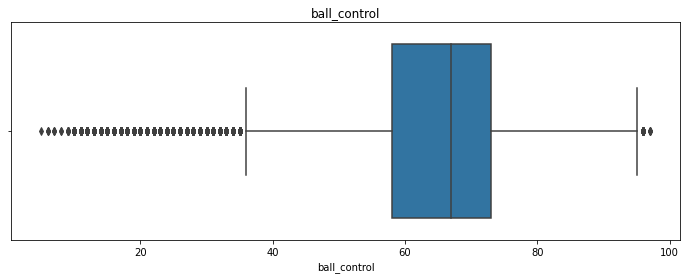

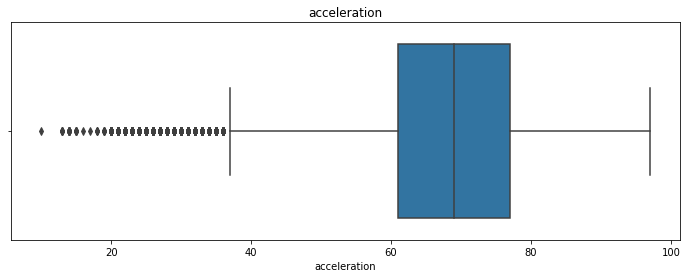

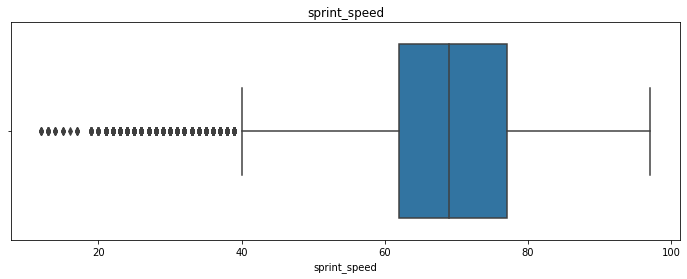

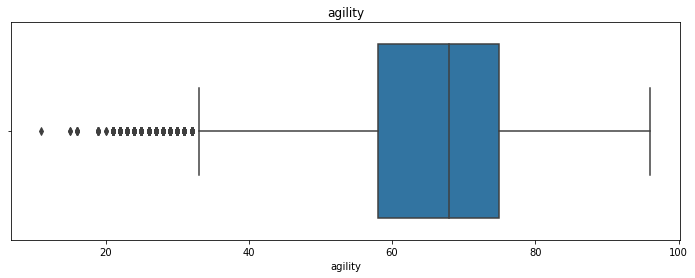

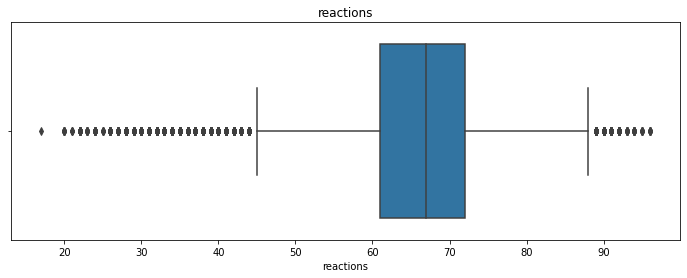

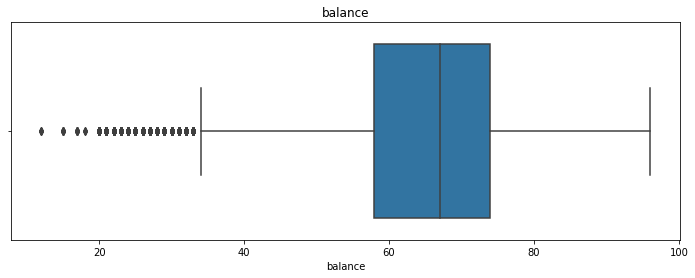

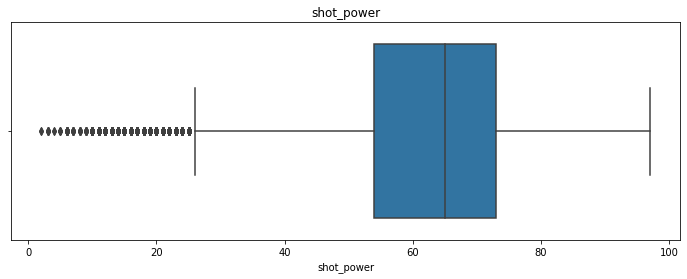

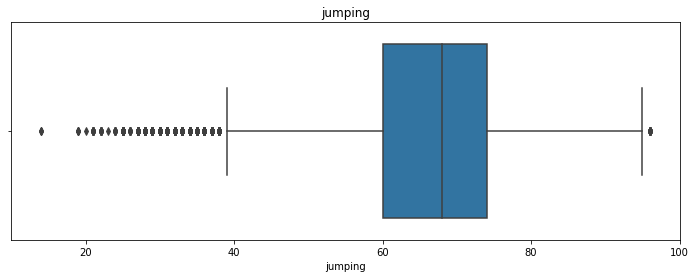

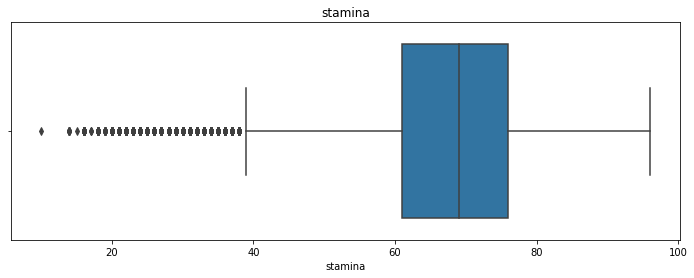

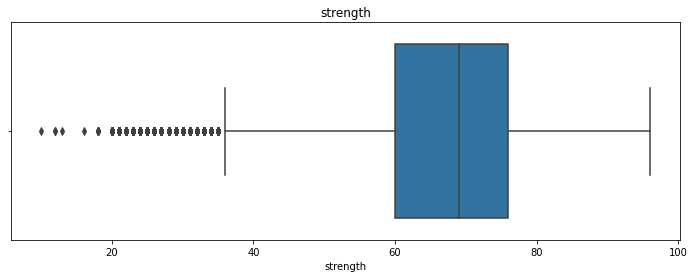

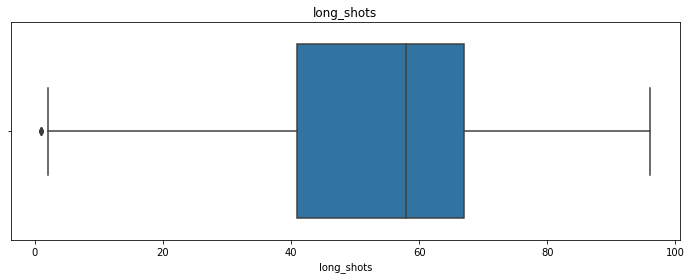

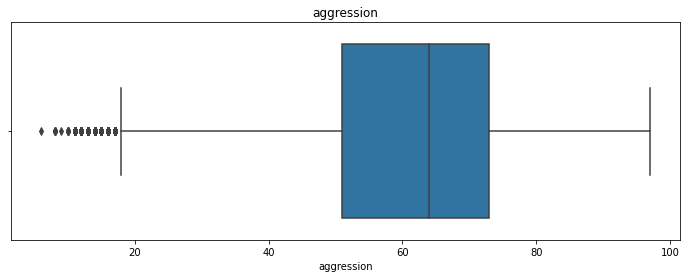

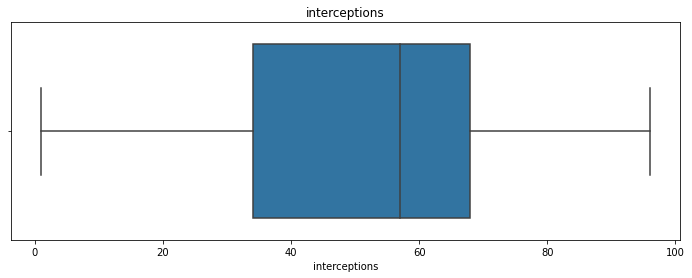

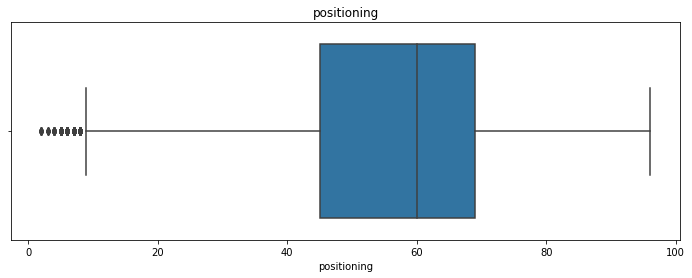

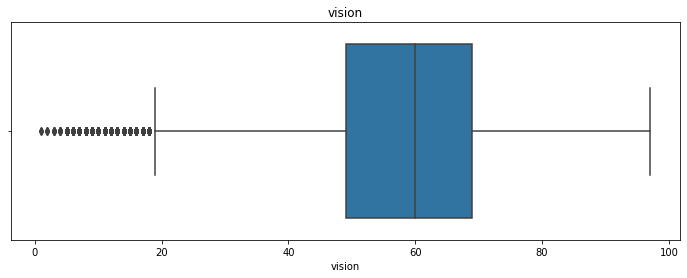

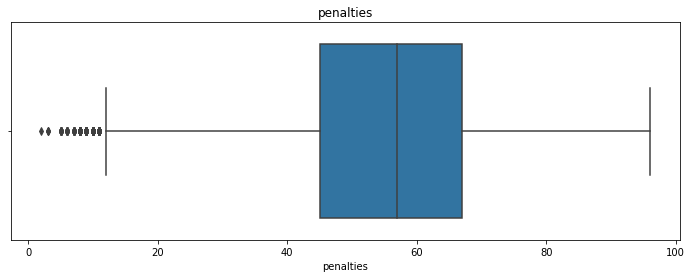

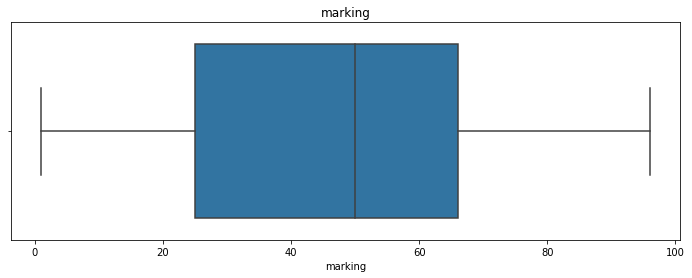

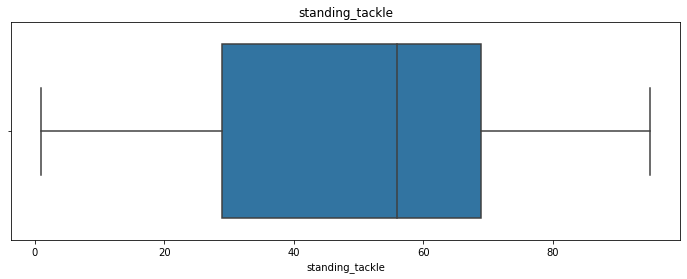

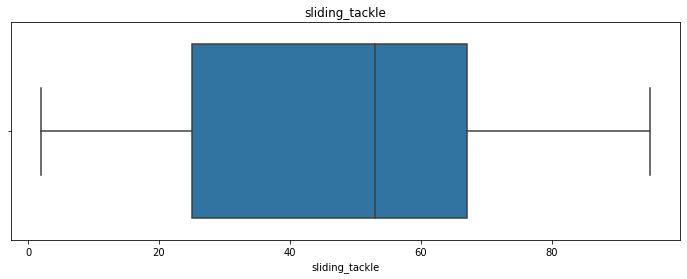

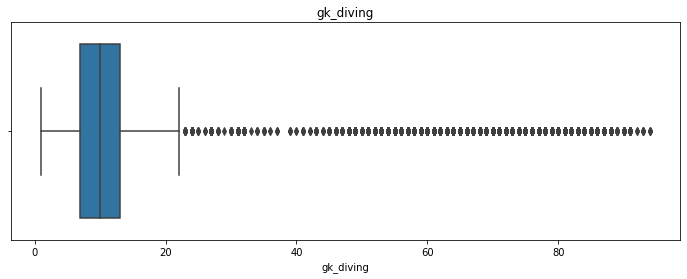

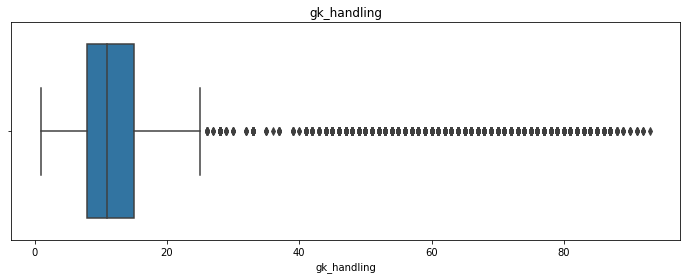

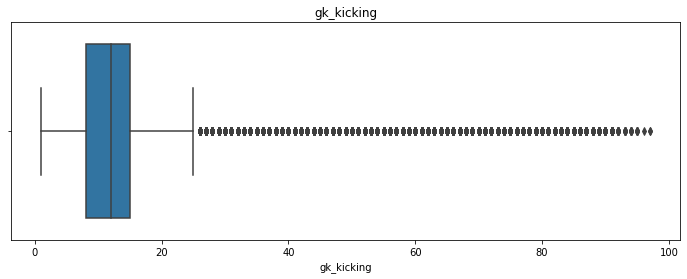

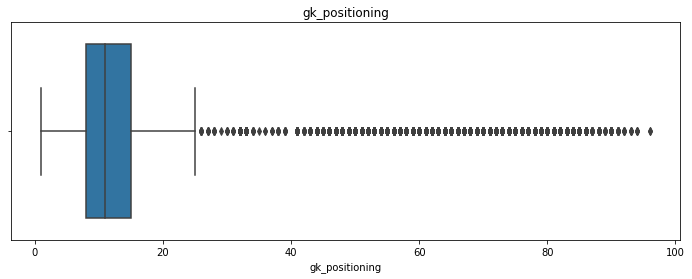

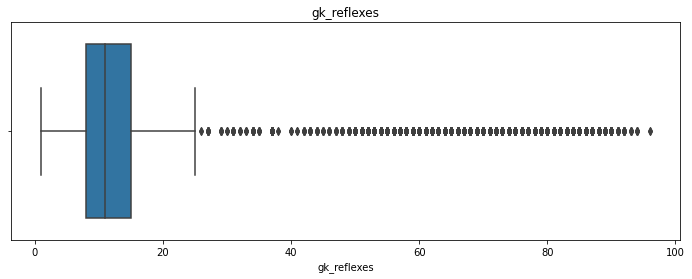

In [22]:
# Outliers
for features in numerical_features:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[features])
    plt.title(features)

In [30]:
df.to_csv('data.csv',index=None)

## Observations:

> Handle the missing values in data

> Remove 'id' feature as it does not affect a players overall_rating

> Perform Power Transformation on the dataset to achieve normally distributed data

> preferred_foot feature needs one hot encoding

> handle outliers

